<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>Método de Galerkin

---


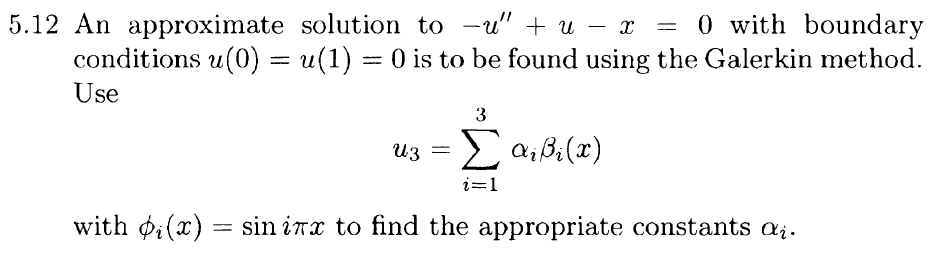

<font size=3> Importamos las librerias a utilizar

In [ ]:
import sympy as sp                      # Para las soluciones, variables, ecuaciones
import numpy as np                      # Para los arrays (vectores) y graficas
import matplotlib.pyplot as plt         # Para las graficas
from tabulate import tabulate           # Para las tablas (presentar los errores)

<font size=3> Definimos las variables <font color=navy>$x,a,b$

In [ ]:
x, a, b = sp.symbols("x, a, b")         # Variables
u = sp.Function("u")                    # Funcion

<font size=3> Escribimos la ecuación a resolver <font color=navy>$u''(x)+u(x)-x$

In [ ]:
ecu = -u(x).diff(x, 2) + u(x) - x        # Ecuacion
ecu

-x + u(x) - Derivative(u(x), (x, 2))

In [ ]:
sp.dsolve(ecu, u(x))

<font size=3> Resolvemos la ecuación con sympy, agregando las restricciones <font color=navy>$u(0)=0$ </font><font size=3> y <font color=navy>$u(1)=0$

---

<font size=2 color=navy>sp.dsolve(eq, func, hint='default', **kwargs)

<font size=2 color=navy>sp.dsolve

Nos permite encontrar la solución analítica de la ecuacion $ecu$

<font size=2 color=navy>eq

La ecuación diferencial

<font size=2 color=navy>func

La función desconocida

<font size=2 color=navy>hint

Indica el método de resolución que debe intentar SymPy (ej. 'separable', 'linear', '1st_linear')

<font size=2 color=navy>ics={}

Le indica a dsolve que debe usar las condiciones iniciales proporcionadas

In [ ]:
sol = sp.dsolve(ecu, ics={u(0):0, u(1):0}) # Solucionamos la ecuacion con las restricciones
sol=sp.simplify(sol)
sol

Eq(u(x), (x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2)))

<font size=3> Creamos una funcion que nos regrese el valor exacto

---

<font size=2 color=navy>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=navy>sp.simplify

Reduce los valores a su forma mas simple, nos ayuda a que sea un numero (float), en lugar de una expresion (ej, 0.04+sin(10))

<font size=2 color=navy>sol.rhs

Nos da el valor de la sol


In [ ]:
valorex = sp.lambdify(x, sp.simplify(sol.rhs), "numpy")   # Creamos un metodo que nos regresa los valores exactos (reales)

<font size=3 color="navy"> Graficamos

---

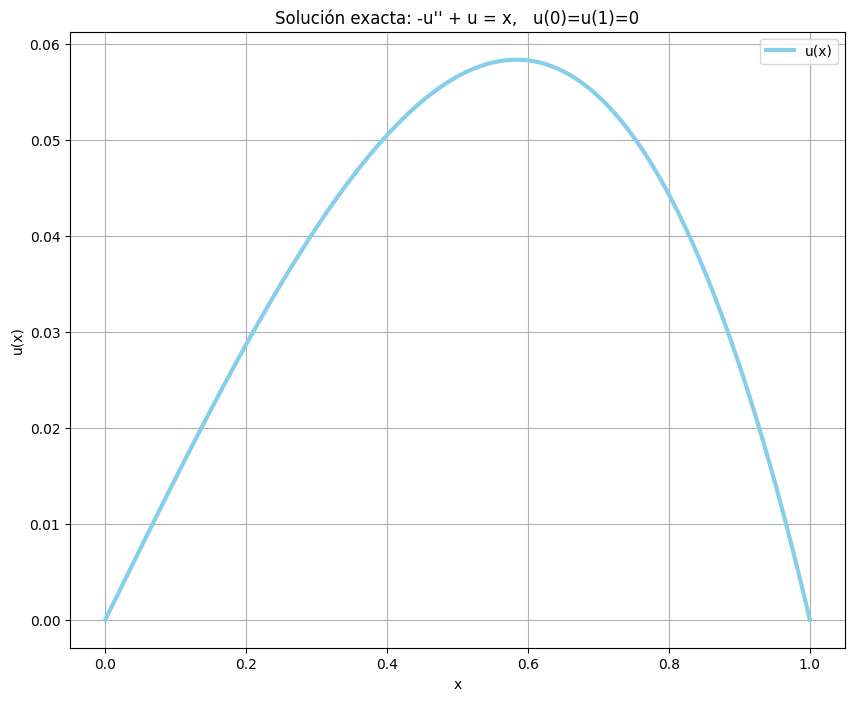

In [ ]:
xx = np.linspace(0, 1, 200)                          # Valores en X
yy = valorex(xx)                                     # Valores en Y
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="u(x)", linewidth=3, color="skyblue")     # Linea
plt.title("Solución exacta: -u'' + u = x,   u(0)=u(1)=0")  # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()

---
<font size=3 color="navy">Método de Galerkin

---


<font size=3> Escribimos la ecuacion $u_N$ = $ax(1-x)+bx^2(1-x)$

In [50]:
un = a*x*(1-x) + b*x**2*(1-x)              # Guardamos la ecuacion en un
un

a*x*(1 - x) + b*x**2*(1 - x)

<font size=3> Calculamos la ecuacion $u_N''$ = $-2a+2b-6bx$

In [ ]:
un2 = sp.simplify(sp.diff(un, x, 2))    # Guardamos la segunda derivada en un2, usamos simplify para reducir terminos
un2

-2*a - 6*b*x + 2*b

<font size=3> Definimos el error $e$ = $-u_N''+u_N-x$

In [51]:
e = sp.simplify(-un2 + un - x)           # Guardamos la ecuacion en e, usamos simplify para reducir terminos
e

-a*x*(x - 1) + 2*a - b*x**2*(x - 1) + 6*b*x - 2*b - x

<font size=3> Finalmente calculamos las integrales de ∫<font color=navy>$ex(1-x)$ </font><font size=3> y ∫<font color=navy>$ex^2(1-x)$

<font size=3> donde $e=−ax(x−1)+2a−bx^2(x−1)+6bx−2b−x$

---

<font size=3> Asi $I_a$=<font color=navy>$∫ex(1-x)dx$ de $[0,1]$


In [52]:
Ia=sp.integrate(e*x*(1-x), (x, 0, 1))          # Guardamos la integral de e^2, usamos simplify para reducir terminos
Ia

11*a/30 + 11*b/60 - 1/12

<font size=3> $I_b$=<font color=navy>$∫ex^2(1-x)dx$ de $[0,1]$

In [53]:
Ib=sp.integrate(e*x**2*(1-x), (x, 0, 1))
Ib

11*a/60 + b/7 - 1/20

<font size=3> Obtenemos la solucion (usando <font color=navy>sp.solve(equacion, argumento)</font><font size=3>) y los valores de <font color=navy>$a$ </font><font size=3> y <font color=navy>$b$

---

<font size=2 color=navy>sp.solve

Nos permite encontrar la solución analítica de la ecuacion <font color="navy">$[I_a, I_b]$

<font size=2 color=navy>$[parcial_a, parcial_b]$

Las integrales

<font size=2 color=navy>[a,b]

Los argumentos que queremos encontrar (incognitas)

In [54]:
sol2 = sp.solve([Ia, Ib], [a, b])                  # Resolvemos las parciales
sol2

{a: 69/473, b: 7/43}

<font size=3> Creamos una funcion que nos regrese el valor calculado de la funcion con el metodo de Galerkin

---

<font size=2 color=navy>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=navy>un.subs()

Sustituye los valores en un, por los que se obtiene de la $sol2$

<font size=2 color=navy>sol2

Que contiene la solucion con metodo de Galerkins

In [55]:
valores = sp.lambdify(x, un.subs(sol2) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

<font size=3 color="navy"> Graficamos

---

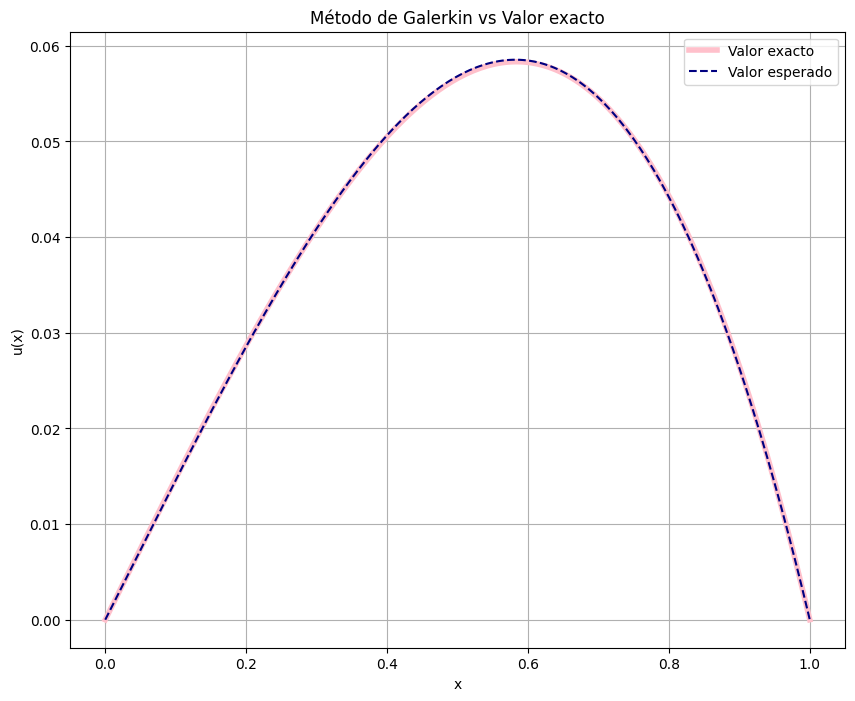

In [64]:
xx = np.linspace(0, 1, 200)                          # Valores en X
y2 = valores(xx)                                     # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", linewidth=4, color="pink")          # Linea exactos
plt.plot(xx, y2,"--", label="Valor esperado", color="navy")                # Linea esperados
plt.title("Método de Galerkin vs Valor exacto")      # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()

<font size=3 color="navy"> Calculamos el error

---

In [96]:
xx = np.linspace(0, 1, 10)                    # Valores en X
vex = valorex(xx)                             # Valores exactos
v1 = valores(xx)                              # Valores Minimos Cuadrados

error = abs(vex-v1)                           # Error Minimos Cuadrados

tabla = list(zip(xx, vex, v1, error))         # Creamos una tabla con los valores
head = ["x", "Valor exacto", "Método de Galerkin", "Error absoluto Galerkin"]  # Titulos
print(tabulate(tabla, headers=head, tablefmt="heavy_grid"))                  # Imprimimos la tabla

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        x ┃   Valor exacto ┃   Método de Galerkin ┃   Error absoluto Galerkin ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0        ┃   -0           ┃            0         ┃               0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.111111 ┃    0.01637     ┃            0.0161941 ┃               0.000175895 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.222222 ┃    0.0315691   ┃            0.031466  ┃               0.000103171 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.333333 ┃    0.0444121   ┃            0.0444758 ┃               6.36475e-05 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.444444 ┃    0.0536845   ┃            0.0538837 ┃               0.000199155 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━

<font size=3> Comparamos con los metodos anteriores

---

In [93]:
# Extraido mi Github (Metodo de Puntos de Colocacion)
points = [0, 1]                          # Creamos un vector con los valores de los puntos de colocacion
ecupuntos = [sp.Eq(e.subs(x, p), 0) for p in points]              # Planteamos la ecuacion 2
solpuntos = sp.solve(ecupuntos, [a, b])                           # Resolvemos la ecuacion 2
valorespuntos = sp.lambdify(x, un.subs(solpuntos) , "numpy")      # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

# Extraido mi Github (Método de Mínimos Cuadrádos)
h2=sp.simplify(e**2)                     # Guardamos el cuadrado de e, usamos simplify para reducir terminos
h22=sp.integrate(h2,(x,0,1))             # Guardamos la integral de e^2, usamos simplify para reducir terminos
pa = sp.diff(h22, a)                     # Calculamos la parcial de a
pb = sp.diff(h22, b)                     # Calculamos la parcial de b
solminimos = sp.solve([pa, pb], [a, b])                           # Resolvemos las parciales
valoresminimos = sp.lambdify(x, un.subs(solminimos) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

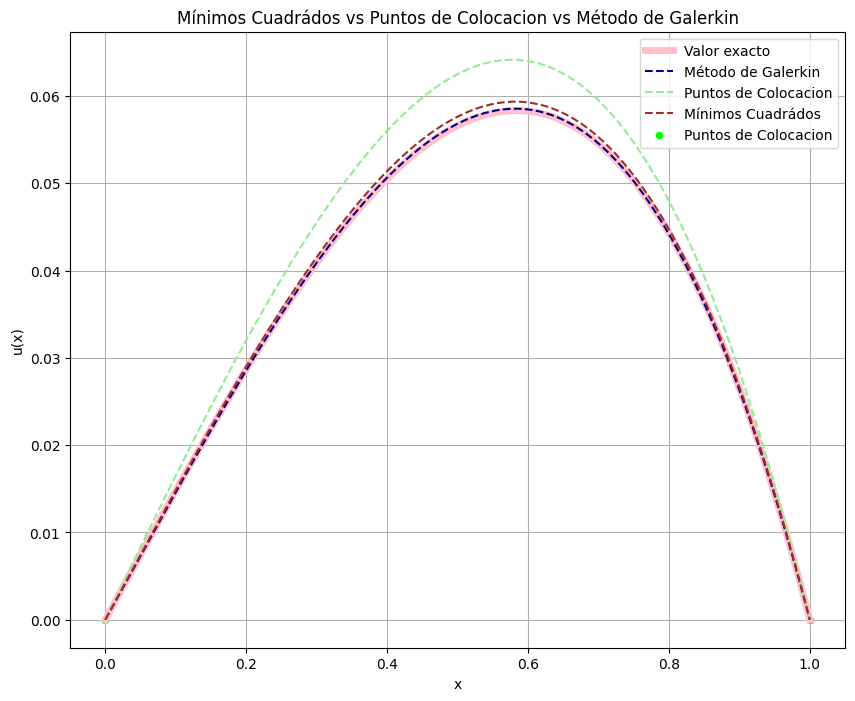

In [94]:
# Grafica
xx = np.linspace(0, 1, 200)                          # Valores en X
ypuntos = valorespuntos(xx)                          # Valores en Y2 (esperados)
yminimos = valoresminimos(xx)                        # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", linewidth=5, color="pink")               # Linea exactos
plt.plot(xx, y2,"--", label="Método de Galerkin", color="navy")                 # Linea Galerkin
plt.plot(xx, ypuntos,"--", label="Puntos de Colocacion", color="lightgreen")    # Linea Puntos de Colocacion
plt.plot(xx, yminimos,"--", label="Mínimos Cuadrádos", color="brown")           # Linea Mínimos Cuadrádos
plt.scatter([0, 1.0], valorespuntos(np.array([0, 1.0])), color="lime", s=20, label="Puntos de Colocacion") # Puntos de Colocacion
plt.title("Mínimos Cuadrádos vs Puntos de Colocacion vs Método de Galerkin")          # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar

In [97]:
vpuntos = valorespuntos(xx)                     # Valores Puntos de Colocacion
vminimos = valoresminimos(xx)                   # Valores Minimos Cuadrados

error2 = abs(v1-vpuntos)                       # Error Puntos a Minimos
error3 = abs(v1-vminimos)                      # Error Puntos a Minimos

tabla = list(zip(xx, v1, vpuntos, error2, vminimos, error3))      # Creamos una tabla con los valores
# Titulos
head = ["x", "Método de Galerkin","Minimos Cuadrados", "Error de Galerkin a Minimos", "Puntos de Colocacion","Error de Galerkin a Puntos"]
print(tabulate(tabla, headers=head, tablefmt="heavy_grid"))                             # Imprimimos la tabla

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        x ┃   Método de Galerkin ┃   Minimos Cuadrados ┃   Error de Galerkin a Minimos ┃   Puntos de Colocacion ┃   Error de Galerkin a Puntos ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0        ┃            0         ┃           0         ┃                    0          ┃              0         ┃                  0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.111111 ┃            0.0161941 ┃           0.0182899 ┃                    0.0020958  ┃              0.0164693 ┃                  0.000275189 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━

<font size=3> Calculamos el error de la Norma

---

<font size=2 color=navy>np.max

Encuentra el valor max, dentro del vector error

<font size=2 color=navy>norma

Contiene el error absoluto máximo con la norma infinito

In [98]:
norma = np.max(error)
print("El error de la Norma de Galerkin", norma)

norma2 = np.max(abs(vex-vpuntos))
print("El error de la Norma de Puntos de Colocacion", norma2)

norma3 = np.max(abs(vex-vminimos))
print("El error de la Norma de Minimos Cuadrados", norma3)

El error de la Norma de Galerkin 0.00022207376496254094
El error de la Norma de Puntos de Colocacion 0.005886914342234928
El error de la Norma de Minimos Cuadrados 0.0010334856806581277


<font size=3> Como podemos comparar, el <font color="navy">Método de Galerkin es mejor </font><font size=3>ya que su error de la Norma Max es menor a comparacion del metodo de Puntos de Colocacion y Minimos Cuadrados

---